In [3]:
import os

def total_files(folder_path):
    return len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])

# Define dataset paths in a dictionary
datasets = {
    "Training": {
        "Bacterial Leaf Blight": "Dataset/Train/Train/Bacterial Leaf Blight",
        "Brown Spot": "Dataset/Train/Train/Brown Spot",
        "Healthy": "Dataset/Train/Train/Healthy",
        "Leaf Blast": "Dataset/Train/Train/Leaf Blast",
        "Leaf Scald": "Dataset/Train/Train/Leaf Scald",
        "Narrow Brown Spot": "Dataset/Train/Train/Narrow Brown Spot",
        "Neck Blast": "Dataset/Train/Train/Neck Blast",
        "Rice Hispa": "Dataset/Train/Train/Rice Hispa",
        "Sheath Blight": "Dataset/Train/Train/Sheath Blight",
        "Tungro": "Dataset/Train/Train/Tungro"
    },
    "Testing": {
        "Bacterial Leaf Blight": "Dataset/Test/Test/Bacterial Leaf Blight",
        "Brown Spot": "Dataset/Test/Test/Brown Spot",
        "Healthy": "Dataset/Test/Test/Healthy",
        "Leaf Blast": "Dataset/Test/Test/Leaf Blast",
        "Leaf Scald": "Dataset/Test/Test/Leaf Scald",
        "Narrow Brown Spot": "Dataset/Test/Test/Narrow Brown Spot",
        "Neck Blast": "Dataset/Test/Test/Neck Blast",
        "Rice Hispa": "Dataset/Test/Test/Rice Hispa",
        "Sheath Blight": "Dataset/Test/Test/Sheath Blight",
        "Tungro": "Dataset/Test/Test/Tungro"
    },
    "Validation": {
        "Bacterial Leaf Blight": "Dataset/Validate/Validate/Bacterial Leaf Blight",
        "Brown Spot": "Dataset/Validate/Validate/Brown Spot",
        "Healthy": "Dataset/Validate/Validate/Healthy",
        "Leaf Blast": "Dataset/Validate/Validate/Leaf Blast",
        "Leaf Scald": "Dataset/Validate/Validate/Leaf Scald",
        "Narrow Brown Spot": "Dataset/Validate/Validate/Narrow Brown Spot",
        "Neck Blast": "Dataset/Validate/Validate/Neck Blast",
        "Rice Hispa": "Dataset/Validate/Validate/Rice Hispa",
        "Sheath Blight": "Dataset/Validate/Validate/Sheath Blight",
        "Tungro": "Dataset/Validate/Validate/Tungro"
    }
}

# Iterate through the datasets and print the file counts
for dataset_type, paths in datasets.items():
    print(f"===== {dataset_type} Set =====")
    for category, path in paths.items():
        print(f"Number of {category.lower()} leaf images: {total_files(path)}")
    print("=============================================")


===== Training Set =====
Number of bacterial leaf blight leaf images: 1386
Number of brown spot leaf images: 1480
Number of healthy leaf images: 1491
Number of leaf blast leaf images: 1801
Number of leaf scald leaf images: 1670
Number of narrow brown spot leaf images: 1416
Number of neck blast leaf images: 1000
Number of rice hispa leaf images: 1461
Number of sheath blight leaf images: 1578
Number of tungro leaf images: 1740
===== Testing Set =====
Number of bacterial leaf blight leaf images: 376
Number of brown spot leaf images: 380
Number of healthy leaf images: 391
Number of leaf blast leaf images: 362
Number of leaf scald leaf images: 386
Number of narrow brown spot leaf images: 382
Number of neck blast leaf images: 322
Number of rice hispa leaf images: 225
Number of sheath blight leaf images: 288
Number of tungro leaf images: 310
===== Validation Set =====
Number of bacterial leaf blight leaf images: 136
Number of brown spot leaf images: 124
Number of healthy leaf images: 131
Numb

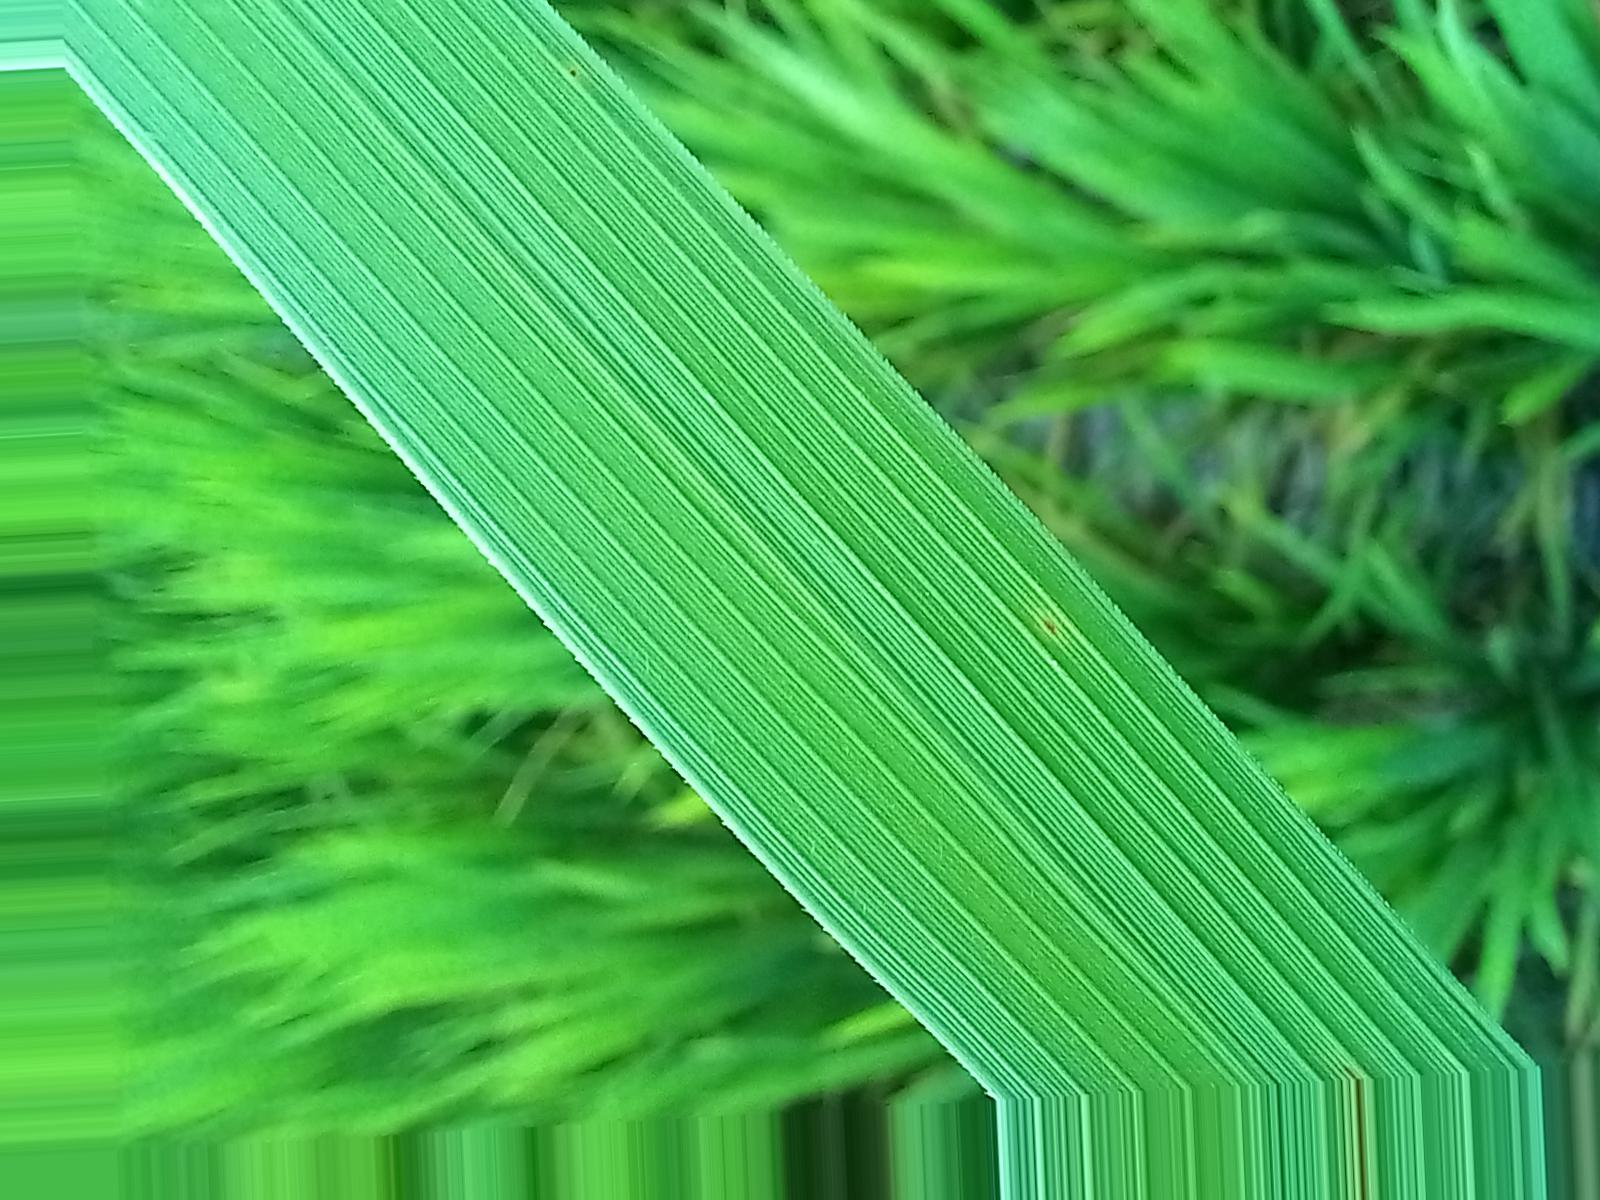

In [4]:
from PIL import Image
import IPython.display as display

image_path = 'Dataset/Train/Train/healthy/healthy20.jpg'

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

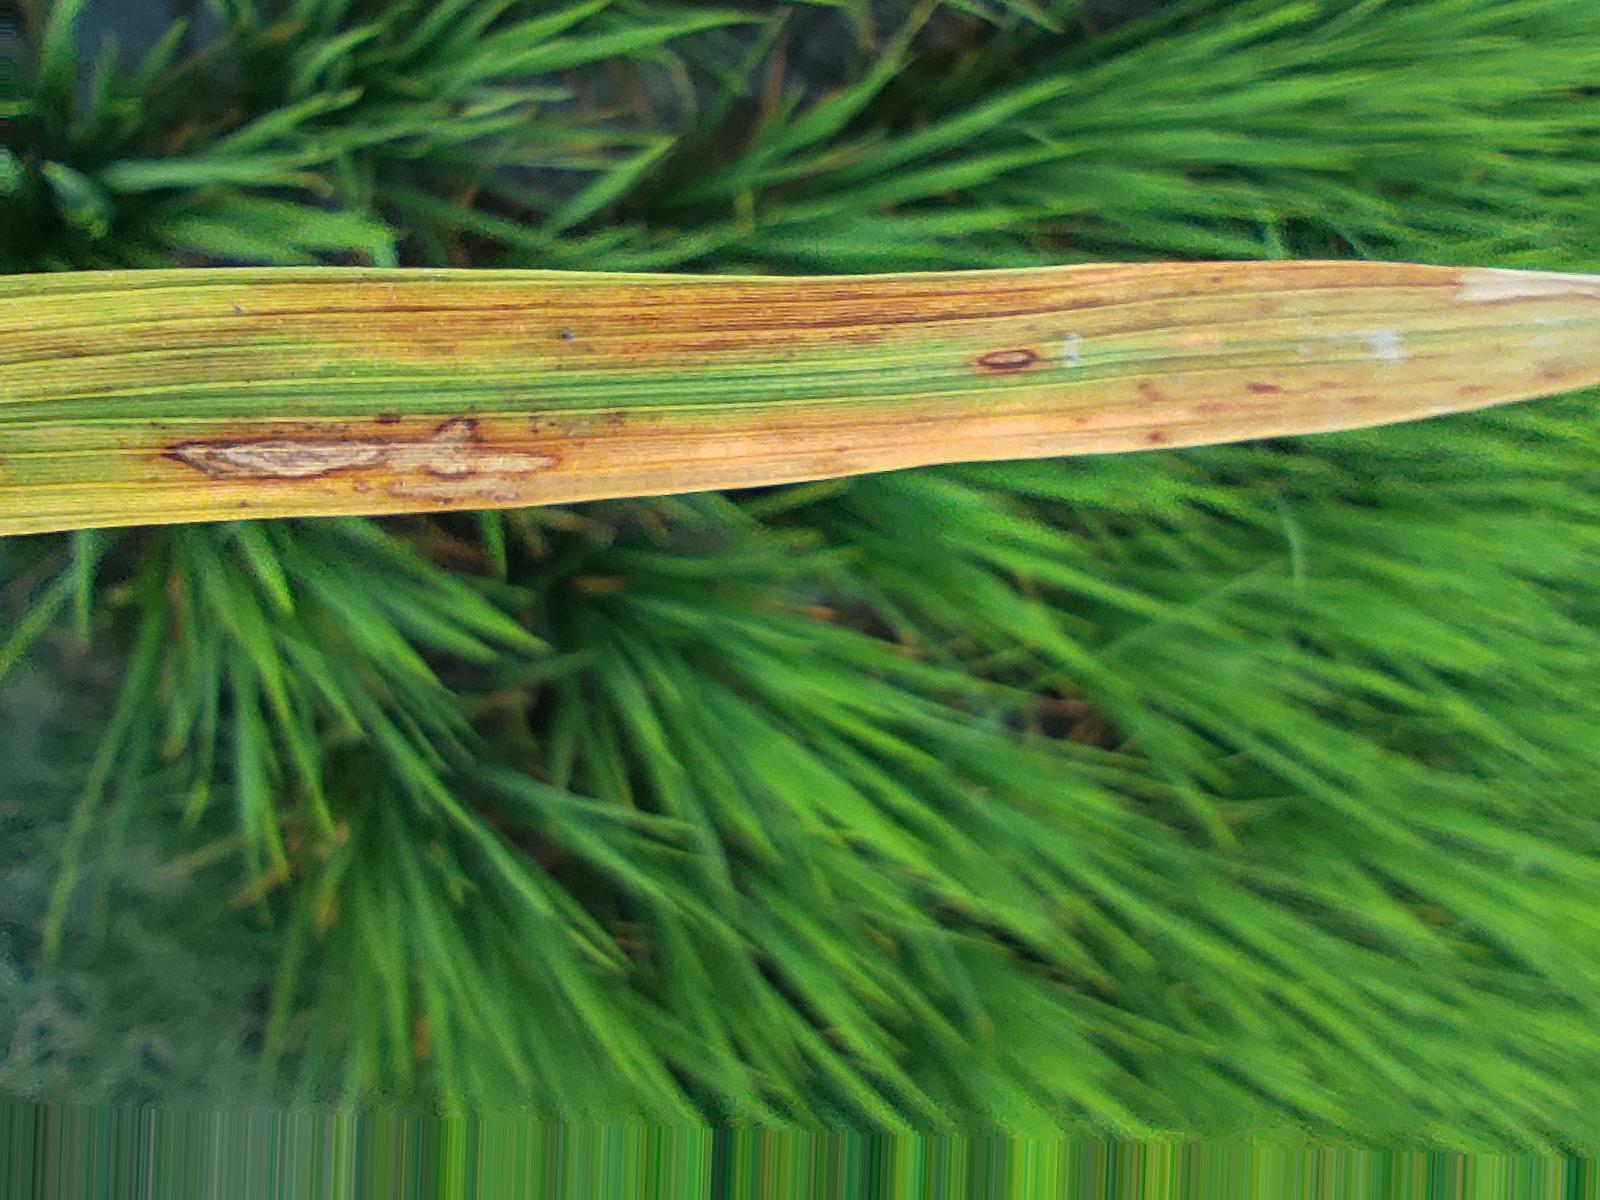

In [46]:
image_path = 'Dataset/Train/Train/leaf_blast/leaf_blast123.jpg'

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

In [11]:
import os
from PIL import Image

def check_non_image_files(directory):
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        try:
            # Try to open the image file
            with Image.open(file_path) as img:
                img.verify()  # Verify that it is an image
        except (IOError, SyntaxError) as e:
            print(f"File: {file_path} - Not a valid image")

# Directories to check
directories = [
    'Dataset/Train/Train/Bacterial Leaf Blight',
    'Dataset/Train/Train/Brown Spot',
    'Dataset/Train/Train/Healthy',
    'Dataset/Train/Train/Leaf Blast',
    'Dataset/Train/Train/Leaf Scald',
    'Dataset/Train/Train/Narrow Brown Spot',
    'Dataset/Train/Train/Neck Blast',
    'Dataset/Train/Train/Rice Hispa',
    'Dataset/Train/Train/Sheath Blight',
    'Dataset/Train/Train/Tungro',
    'Dataset/Test/Test/Bacterial Leaf Blight',
    'Dataset/Test/Test/Brown Spot',
    'Dataset/Test/Test/Healthy',
    'Dataset/Test/Test/Leaf Blast',
    'Dataset/Test/Test/Leaf Scald',
    'Dataset/Test/Test/Narrow Brown Spot',
    'Dataset/Test/Test/Neck Blast',
    'Dataset/Test/Test/Rice Hispa',
    'Dataset/Test/Test/Sheath Blight',
    'Dataset/Test/Test/Tungro',
    'Dataset/Validate/Validate/Bacterial Leaf Blight',
    'Dataset/Validate/Validate/Brown Spot',
    'Dataset/Validate/Validate/Healthy',
    'Dataset/Validate/Validate/Leaf Blast',
    'Dataset/Validate/Validate/Leaf Scald',
    'Dataset/Validate/Validate/Narrow Brown Spot',
    'Dataset/Validate/Validate/Neck Blast',
    'Dataset/Validate/Validate/Rice Hispa',
    'Dataset/Validate/Validate/Sheath Blight',
    'Dataset/Validate/Validate/Tungro'
]

# Apply the check to all directories
for directory in directories:
    check_non_image_files(directory)


File: Dataset/Train/Train/Brown Spot\brown_spot772.jpg - Not a valid image


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

In [13]:

train_generator = train_datagen.flow_from_directory(
    'Dataset/Train/Train',
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical'  # Ensures labels are one-hot encoded
)

validation_generator = validation_datagen.flow_from_directory(
    'Dataset/Validate/Validate',
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical'  # Ensures labels are one-hot encoded
)

Found 15023 images belonging to 10 classes.
Found 1338 images belonging to 10 classes.


In [14]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))  # Correct input shape
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())  # Flatten the output to 1D
model.add(Dense(128, activation='relu'))  # Fully connected layer
model.add(Dense(10, activation='softmax'))  # Output layer for 14 classes

In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator,
    batch_size=16
)

Epoch 1/5
939/939 ━━━━━━━━━━━━━━━━━━━━ 631s 667ms/step - accuracy: 0.4630 - loss: 2.3549 - val_accuracy: 0.6771 - val_loss: 0.9871
Epoch 2/5
939/939 ━━━━━━━━━━━━━━━━━━━━ 631s 669ms/step - accuracy: 0.7340 - loss: 0.7960 - val_accuracy: 0.7534 - val_loss: 0.7391
Epoch 3/5
939/939 ━━━━━━━━━━━━━━━━━━━━ 632s 670ms/step - accuracy: 0.8348 - loss: 0.4998 - val_accuracy: 0.7436 - val_loss: 0.7306
Epoch 4/5
939/939 ━━━━━━━━━━━━━━━━━━━━ 600s 636ms/step - accuracy: 0.9118 - loss: 0.2787 - val_accuracy: 0.7459 - val_loss: 0.7987
Epoch 5/5
939/939 ━━━━━━━━━━━━━━━━━━━━ 390s 412ms/step - accuracy: 0.9454 - loss: 0.1721 - val_accuracy: 0.7653 - val_loss: 0.7585


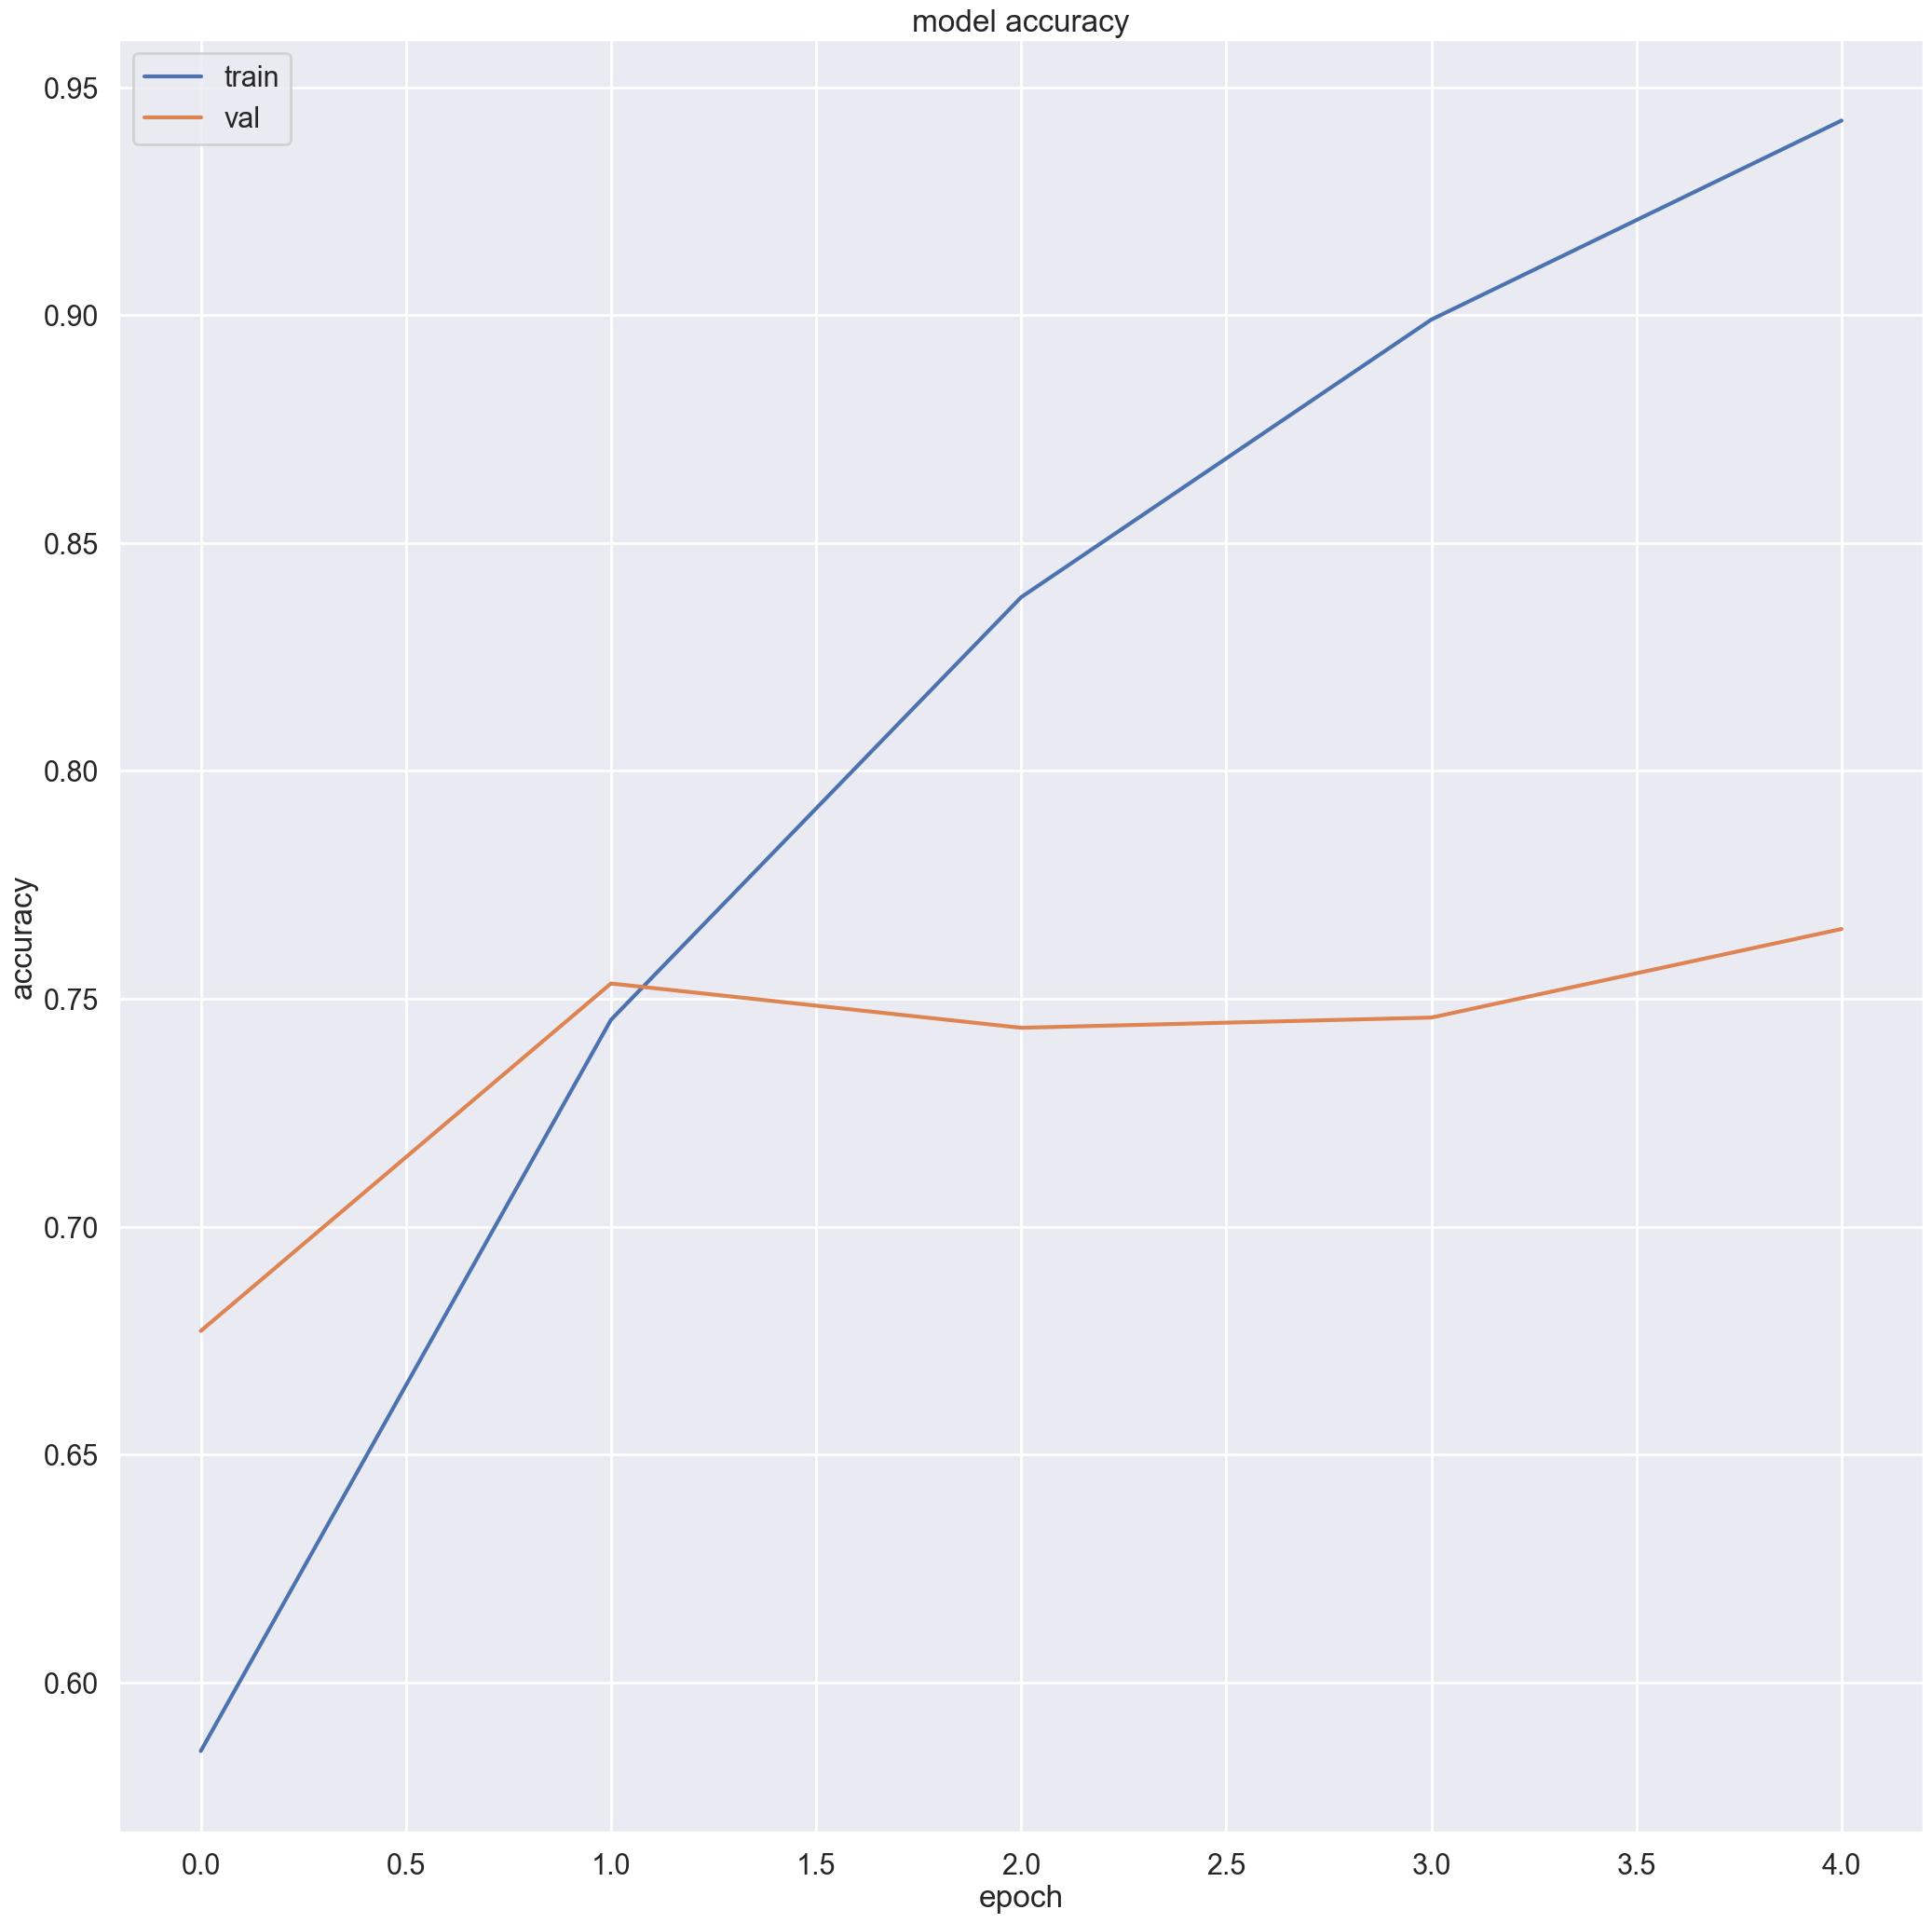

In [17]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns
sns.set_theme()
sns.set_context("poster")

figure(figsize=(25, 25), dpi=100)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [18]:
model.save("model.h5")

In [28]:

from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def preprocess_image(image_path, target_size=(150, 150)):  # Adjusted target_size
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x

x = preprocess_image('Dataset/Test/Test/Neck Blast/IMG20201109210749_00.jpg')

In [29]:
predictions = model.predict(x)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


array([1.0109567e-09, 3.4910216e-14, 4.7449541e-07, 4.2866699e-08,
       5.6377494e-13, 1.5343475e-12, 9.9999928e-01, 1.5206176e-07,
       3.6157638e-10, 1.4900536e-12], dtype=float32)

In [30]:
labels = train_generator.class_indices
labels = {v: k for k, v in labels.items()}
labels

{0: 'Bacterial Leaf Blight',
 1: 'Brown Spot',
 2: 'Healthy',
 3: 'Leaf Blast',
 4: 'Leaf Scald',
 5: 'Narrow Brown Spot',
 6: 'Neck Blast',
 7: 'Rice Hispa',
 8: 'Sheath Blight',
 9: 'Tungro'}

In [31]:
predicted_label = labels[np.argmax(predictions)]
print(predicted_label)

Neck Blast
